In [1]:
import torch
import torch.nn as nn
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from preparing import ImageGenerator, train, test

In [2]:
batch_size = 64
max_dimension = 512
n_classes = 7

In [18]:
model = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.BatchNorm2d(64),
 
            nn.Conv2d(64, 128, kernel_size=3, stride=2, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8
            nn.BatchNorm2d(128),
 
            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4
            nn.BatchNorm2d(256),
             
            nn.AdaptiveAvgPool2d((1,1)),# 256 x 1 x 1
 
            nn.Flatten(), 
            nn.Linear(256*1*1, 128),
            nn.ReLU(),
            nn.Linear(128, n_classes),
            nn.Softmax())

In [19]:

loss_fn=nn.CrossEntropyLoss()
optimizer= torch.optim.Adam(model.parameters(),lr=0.001,weight_decay = 0.0001)

In [20]:
from torchsummary import summary
summary(model,(3,128,128))

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 64, 64]          1,792
├─ReLU: 1-2                              [-1, 64, 64, 64]          --
├─MaxPool2d: 1-3                         [-1, 64, 32, 32]          --
├─BatchNorm2d: 1-4                       [-1, 64, 32, 32]          128
├─Conv2d: 1-5                            [-1, 128, 16, 16]         73,856
├─ReLU: 1-6                              [-1, 128, 16, 16]         --
├─Conv2d: 1-7                            [-1, 128, 16, 16]         147,584
├─ReLU: 1-8                              [-1, 128, 16, 16]         --
├─MaxPool2d: 1-9                         [-1, 128, 8, 8]           --
├─BatchNorm2d: 1-10                      [-1, 128, 8, 8]           256
├─Conv2d: 1-11                           [-1, 256, 8, 8]           295,168
├─ReLU: 1-12                             [-1, 256, 8, 8]           --
├─MaxPool2d: 1-13                        [-1, 256, 4, 4]          

Layer (type:depth-idx)                   Output Shape              Param #
├─Conv2d: 1-1                            [-1, 64, 64, 64]          1,792
├─ReLU: 1-2                              [-1, 64, 64, 64]          --
├─MaxPool2d: 1-3                         [-1, 64, 32, 32]          --
├─BatchNorm2d: 1-4                       [-1, 64, 32, 32]          128
├─Conv2d: 1-5                            [-1, 128, 16, 16]         73,856
├─ReLU: 1-6                              [-1, 128, 16, 16]         --
├─Conv2d: 1-7                            [-1, 128, 16, 16]         147,584
├─ReLU: 1-8                              [-1, 128, 16, 16]         --
├─MaxPool2d: 1-9                         [-1, 128, 8, 8]           --
├─BatchNorm2d: 1-10                      [-1, 128, 8, 8]           256
├─Conv2d: 1-11                           [-1, 256, 8, 8]           295,168
├─ReLU: 1-12                             [-1, 256, 8, 8]           --
├─MaxPool2d: 1-13                        [-1, 256, 4, 4]          

In [16]:
train_image_directory = 'data/parts_train/mouth'
valid_image_directory = 'data/parts_val/mouth'
train_generator = ImageGenerator(train_image_directory, batch_size=batch_size, shuffle=True, max_dimension=max_dimension)
valid_generator = ImageGenerator(valid_image_directory, batch_size=batch_size, max_dimension=max_dimension)

In [22]:
epochs=20
best_model, train_losses, train_accus, eval_losses, eval_accus = train(epochs,model,train_generator, valid_generator,loss_fn, optimizer)

model_json = best_model.to_json()
with open("best_model.json", "w") as json_file:      
    json_file.write(model_json)

# save trained model weight in .h5 file
best_model.save_weights('full_model.h5')

Epoch 1/20
--------------------


  0%|          | 0/307 [00:00<?, ?it/s]c:\Users\nmmyt\AppData\Local\Programs\Python\Python310\lib\site-packages\torch\nn\modules\container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)
100%|██████████| 307/307 [09:29<00:00,  1.85s/it]


Train Loss: 2.161 | Train Accuracy: 38.439


100%|██████████| 39/39 [00:34<00:00,  1.12it/s]


Valid Loss: 1.8441 Acc: 30.5533
Epoch 2/20
--------------------


100%|██████████| 307/307 [07:45<00:00,  1.52s/it]


Train Loss: 1.957 | Train Accuracy: 40.697


100%|██████████| 39/39 [00:21<00:00,  1.81it/s]


Valid Loss: 1.8138 Acc: 33.4418
Epoch 3/20
--------------------


100%|██████████| 307/307 [07:46<00:00,  1.52s/it]


Train Loss: 1.864 | Train Accuracy: 41.707


100%|██████████| 39/39 [00:26<00:00,  1.45it/s]


Valid Loss: 1.8307 Acc: 31.0008
Epoch 4/20
--------------------


100%|██████████| 307/307 [08:02<00:00,  1.57s/it]


Train Loss: 1.823 | Train Accuracy: 41.951


100%|██████████| 39/39 [00:26<00:00,  1.47it/s]


Valid Loss: 1.8186 Acc: 32.7095
Epoch 5/20
--------------------


100%|██████████| 307/307 [08:01<00:00,  1.57s/it]


Train Loss: 1.803 | Train Accuracy: 42.262


100%|██████████| 39/39 [00:29<00:00,  1.33it/s]


Valid Loss: 1.8135 Acc: 32.7095
Epoch 6/20
--------------------


100%|██████████| 307/307 [07:46<00:00,  1.52s/it]


Train Loss: 1.794 | Train Accuracy: 42.604


100%|██████████| 39/39 [00:21<00:00,  1.82it/s]


Valid Loss: 1.7904 Acc: 35.4353
Epoch 7/20
--------------------


100%|██████████| 307/307 [08:01<00:00,  1.57s/it]


Train Loss: 1.787 | Train Accuracy: 42.945


100%|██████████| 39/39 [00:21<00:00,  1.83it/s]


Valid Loss: 1.7994 Acc: 33.8487
Epoch 8/20
--------------------


100%|██████████| 307/307 [07:58<00:00,  1.56s/it]


Train Loss: 1.782 | Train Accuracy: 42.986


100%|██████████| 39/39 [00:27<00:00,  1.43it/s]


Valid Loss: 1.8002 Acc: 34.5403
Epoch 9/20
--------------------


100%|██████████| 307/307 [07:52<00:00,  1.54s/it]


Train Loss: 1.782 | Train Accuracy: 43.032


100%|██████████| 39/39 [00:21<00:00,  1.83it/s]


Valid Loss: 1.8194 Acc: 33.5232
Epoch 10/20
--------------------


100%|██████████| 307/307 [07:40<00:00,  1.50s/it]


Train Loss: 1.774 | Train Accuracy: 43.470


100%|██████████| 39/39 [00:26<00:00,  1.46it/s]


Valid Loss: 1.7979 Acc: 34.9878
Epoch 11/20
--------------------


100%|██████████| 307/307 [07:46<00:00,  1.52s/it]


Train Loss: 1.771 | Train Accuracy: 43.689


100%|██████████| 39/39 [00:21<00:00,  1.81it/s]


Valid Loss: 1.7860 Acc: 36.4524
Epoch 12/20
--------------------


100%|██████████| 307/307 [07:43<00:00,  1.51s/it]


Train Loss: 1.769 | Train Accuracy: 43.603


100%|██████████| 39/39 [00:26<00:00,  1.48it/s]


Valid Loss: 1.7653 Acc: 38.3645
Epoch 13/20
--------------------


100%|██████████| 307/307 [07:53<00:00,  1.54s/it]


Train Loss: 1.767 | Train Accuracy: 43.771


100%|██████████| 39/39 [00:21<00:00,  1.85it/s]


Valid Loss: 1.7685 Acc: 37.8356
Epoch 14/20
--------------------


100%|██████████| 307/307 [08:00<00:00,  1.56s/it]


Train Loss: 1.765 | Train Accuracy: 44.036


100%|██████████| 39/39 [00:21<00:00,  1.79it/s]


Valid Loss: 1.7816 Acc: 36.3710
Epoch 15/20
--------------------


100%|██████████| 307/307 [07:59<00:00,  1.56s/it]


Train Loss: 1.761 | Train Accuracy: 44.373


100%|██████████| 39/39 [00:25<00:00,  1.55it/s]


Valid Loss: 1.7602 Acc: 38.6900
Epoch 16/20
--------------------


100%|██████████| 307/307 [07:57<00:00,  1.56s/it]


Train Loss: 1.762 | Train Accuracy: 44.209


100%|██████████| 39/39 [00:21<00:00,  1.82it/s]


Valid Loss: 1.7724 Acc: 37.5509
Epoch 17/20
--------------------


100%|██████████| 307/307 [07:45<00:00,  1.52s/it]


Train Loss: 1.761 | Train Accuracy: 44.311


100%|██████████| 39/39 [00:27<00:00,  1.40it/s]


Valid Loss: 1.8466 Acc: 30.1871
Epoch 18/20
--------------------


100%|██████████| 307/307 [07:51<00:00,  1.54s/it]


Train Loss: 1.762 | Train Accuracy: 44.245


100%|██████████| 39/39 [00:21<00:00,  1.82it/s]


Valid Loss: 1.7787 Acc: 36.8999
Epoch 19/20
--------------------


100%|██████████| 307/307 [08:07<00:00,  1.59s/it]


Train Loss: 1.760 | Train Accuracy: 44.423


100%|██████████| 39/39 [00:21<00:00,  1.82it/s]


Valid Loss: 1.7776 Acc: 36.7779
Epoch 20/20
--------------------


100%|██████████| 307/307 [08:01<00:00,  1.57s/it]


Train Loss: 1.760 | Train Accuracy: 44.357


100%|██████████| 39/39 [00:21<00:00,  1.86it/s]

Valid Loss: 1.7605 Acc: 39.1375
Training complete in 167m 38s
Best val Acc: 39.137510


AttributeError: 'Sequential' object has no attribute 'to_json'

In [26]:
# Function to save the model 
def saveModel(): 
    path = "./mouthModel.pth" 
    torch.save(best_model.state_dict(), path)
saveModel()

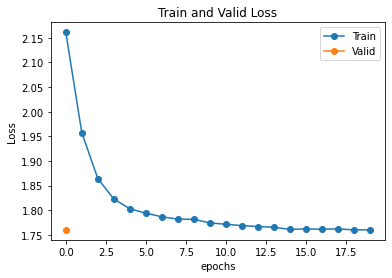

In [30]:
plt.plot(train_losses, '-o')
plt.plot(eval_losses, '-o')

plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend(['Train','Valid'])
plt.title('Train and Valid Loss')
plt.show()